# Machine Learning (laboratory instruction)
## Linear regression (part 7)

### The goal
There are two goals of this laboratory:

1. Implement Stochastic Gradient Descent (Mini-batch Gradient Descent).
2. Use ML libraries to perform Linear Regression.

In [1]:
# >>> WRITE YOUR CODE BELOW <<<
import sklearn
import sklearn.datasets
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_boston()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset['data'], dataset['target'], test_size=0.5, random_state=123, shuffle=True)

### Task 1. Implement Stochastic Gradient Descent (Mini-batch Gradient Descent).

**Tasks**: 
* 2.1. Implement the Mini-batch GD
* 2.2. Prepare the data (if needed).
* 2.3. Visualize: 
    * a) the data, 
    * b) results, 
    * c) cost functions.
* 2.4. Check how the algorithm behaves for different batch sizes.

In [2]:
def fun(weight, x):
    weights = []
    for i in range(len(x)):
        weights.append(weight.T @ x[i])
    return weights

# Defining gradient
def gradient(weight, alpha, x, y):
    grad = 2/len(y)*x.T @ (fun(weight, x) - y)
    return weight-alpha*grad

# Defining cost function
def cost(weight_value, x, y):
    cost = y - fun(weight_value, x)
    cost = cost**2
    cost_sum = cost.sum()
    return cost_sum/len(y)

# Defining an array of steps for weight calculation
def linear_regression(weight, epochs, alpha, x, y, batch):
    step_list = []
    cost_train = []
    cost_test = []
    
    for i in range(epochs):
        cost_train.append(cost(weight, x_train, y_train))
        cost_test.append(cost(weight, x_test, y_test))
        
        for j in range(int(np.ceil(len(x)/batch))):
            bx = x[j*batch:(j+1)*batch]
            by = y[j*batch:(j+1)*batch]
            step_list.append(weight)
            weight = gradient(weight, alpha, x, y)
            
    return step_list, cost_train, cost_test

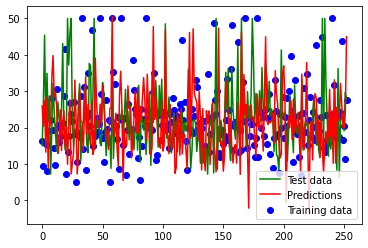

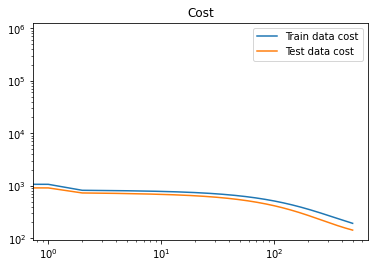

In [3]:
start_weight = np.zeros(len(x_train[0]))
start_weight = start_weight + 1
alpha = 0.0000005
epochs = 500
batch = 25

step_list, cost_train, cost_test = linear_regression(start_weight, epochs, alpha, x_train, y_train, batch)
final_weight = step_list[-1]

predictions = fun(final_weight, x_test)

plt.scatter(range(len(x_train)), y_train, color = "blue", label = "Training data")
plt.plot(range(len(x_test)), y_test, color = "green", label = "Test data")
plt.plot(range(len(x_test)), predictions, color = "red", label = "Predictions")
plt.legend()
plt.show()

plt.xscale("log")
plt.yscale("log")
plt.title("Cost")
plt.plot(range(epochs), cost_train, label = "Train data cost")
plt.plot(range(epochs), cost_test, label = "Test data cost")
plt.legend()
plt.show()

In [4]:
# When increasing batch variable value the cost functions values increase
# The amplitude of predicted values is also getting bigger

### Task 2. Train linear regression model.

2. Use at least two widely used ML libraries to perform Linear Regression (you may also use those that are not mentioned in the list below) and describe the differences between them:
    * Scikit-learn, a couple of options available:
        * LinearRegression 
        * SGDRegressor
        * Ridge
        * Lasso
        * ElasticNet
    * Scipy
        * scipy.linalg.lstsq
        * scipy.stats.linregress
    * Tensorflow
    * Pytorch
    * JAX



Mean Absolute Error: 3.4480325145125175
Mean Squared Error: 24.25697631426204
Mean Root Squared Error: 4.925137187354484


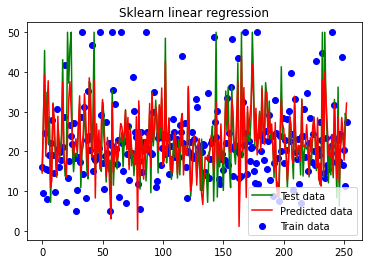

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(x_train, y_train)

y_lr_pred = lr.predict(x_test)

plt.title("Sklearn linear regression")
plt.scatter(range(len(x_train)), y_train, color = "blue", label = "Train data")
plt.plot(range(len(x_test)), y_test, color = "green", label = "Test data")
plt.plot(range(len(x_test)), y_lr_pred, color = "red", label = "Predicted data")
plt.legend()

print('Mean Absolute Error:', mean_absolute_error(y_test, y_lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_lr_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_lr_pred)))


Mean Absolute Error: 3.5543667811149096
Mean Squared Error: 27.489299822809684
Mean Root Squared Error: 5.243023919725113


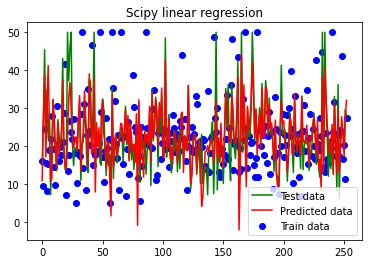

In [6]:
import scipy

p, res, rnk, s = scipy.linalg.lstsq(x_train, y_train)
sci_predict = fun(p, x_test)


plt.title("Scipy linear regression")
plt.scatter(range(len(x_train)), y_train, color = "blue", label = "Train data")
plt.plot(range(len(x_test)), y_test, color = "green", label = "Test data")
plt.plot(range(len(x_test)), sci_predict, color = "red", label = "Predicted data")
plt.legend()
  
print('Mean Absolute Error:', mean_absolute_error(y_test, sci_predict))
print('Mean Squared Error:', mean_squared_error(y_test, sci_predict))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, sci_predict)))# >>> WRITE YOUR CODE BELOW <<<



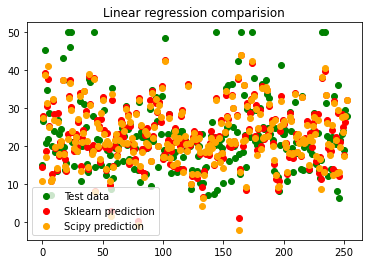

In [7]:
plt.title("Linear regression comparision")
plt.scatter(range(len(x_test)), y_test, color = "green", label = "Test data")
plt.scatter(range(len(x_test)), y_lr_pred, color = "red", label = "Sklearn prediction")
plt.scatter(range(len(x_test)), sci_predict, color = "orange", label = "Scipy prediction")
plt.legend()

In [8]:
# Both this methods are similarily efficient. Predictions given by them are 
# almost equal. The Scipy linear regression has slightly wider amplitude of predicted
# values. Also values of error for scipy are slightly bigger than for sklearn.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     53.19
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.12e-63
Time:                        14:09:37   Log-Likelihood:                -749.00
No. Observations:                 253   AIC:                             1526.
Df Residuals:                     239   BIC:                             1575.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5963      7.307      3.503      0.0

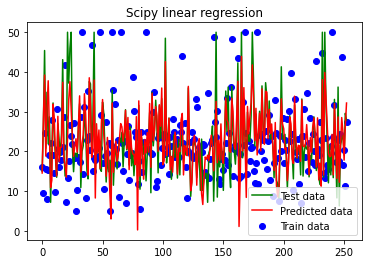

In [9]:
import statsmodels.api as sm
x, y = np.array(x_train), np.array(y_train)
x = sm.add_constant(x) #Adds column of 1 to the x data
x_test_stats = sm.add_constant(x_test)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

predictions = results.predict(x_test_stats)

plt.title("Scipy linear regression")
plt.scatter(range(len(x_train)), y_train, color = "blue", label = "Train data")
plt.plot(range(len(x_test)), y_test, color = "green", label = "Test data")
plt.plot(range(len(x_test)), predictions, color = "red", label = "Predicted data")
plt.legend()